# DTW simple example

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The dtw module contains a single function named dtw as well.

In [2]:
from dtw import dtw

## Let's define two sequences:

In [3]:
x = array([0, 0, 1, 1, 2, 4, 2, 1, 2, 0]).reshape(-1, 1)
y = array([1, 1, 1, 2, 2, 2, 2, 3, 2, 0]).reshape(-1, 1)

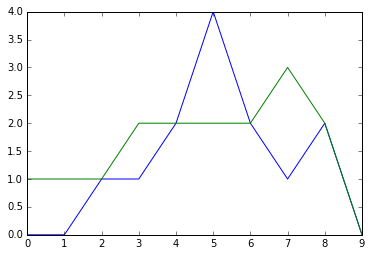

In [4]:
plot(x)
plot(y)

## Compute DTW

In [5]:
dist, cost, acc, path = dtw(x, y, dist=lambda x, y: norm(x - y, ord=1))

In [6]:
print 'Minimum distance found:', dist

Minimum distance found: 0.2


### You can plot the accumulated cost matrix and the "shortest" wrap path.

(-0.5, 9.5)

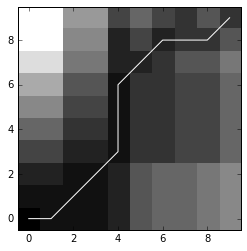

In [7]:
imshow(acc.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')
xlim((-0.5, acc.shape[0]-0.5))
ylim((-0.5, acc.shape[1]-0.5))

## Using another distance

You can specify your own distance used as the cost measure by the DTW. By default the L1 norm is used.

In [8]:
def my_custom_norm(x, y):
    return (x * x) + (y * y)

dist, cost, acc, path = dtw(x, y, dist=my_custom_norm)

Obviously you can also directly use those defined in [numpy](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html).

In [9]:
from numpy.linalg import norm

dist, cost, acc, path = dtw(x, y, dist=norm)

/Users/pierrerouanet/.pyenv/versions/anaconda-2.4.0/lib/python2.7/site-packages/numpy/linalg/linalg.py:2119: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  (ord in ('f', 'fro') and ndim == 2) or


## Using subsequences

The sequences used can be of different length. DTW can also be useful to detect subsequences.

In [10]:
x = range(10)
y = [0] * 5 + x

x = array(x).reshape(-1, 1)
y = array(y).reshape(-1, 1)

In [11]:
dist, cost, acc, path = dtw(x, y, dist=lambda x, y: norm(x - y, ord=1))

(-0.5, 14.5)

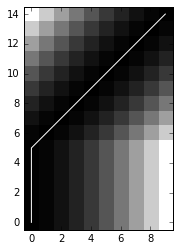

In [12]:
imshow(acc.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')
xlim((-0.5, acc.shape[0]-0.5))
ylim((-0.5, acc.shape[1]-0.5))